# 데이터 기계학습 기말 프로젝트

1. 시각화를 할 때 death event가 1/0 인 경우를 나눠서 봐야 합니다.    
2. PCA 등을 통해 어떤 요인들이 중요한 영향을 끼치는지 확인해보세요. - Logistic Regression 도 고려해보세요    
3. -히트맵과 상관관계를 확인하고, 어떤 요인들이 서로 연관성이 높은지 파악해보세요.    
이번 과제를 통해 많은 것을 배울 수 있기 바랍니다.   

<b> <공통사항> </b>   
하이퍼파라미터 최적화(그리드서치)를 분석에 추가    
앙상블과 파이프라인을 이용한 코드정리    
발표는 15분 정도

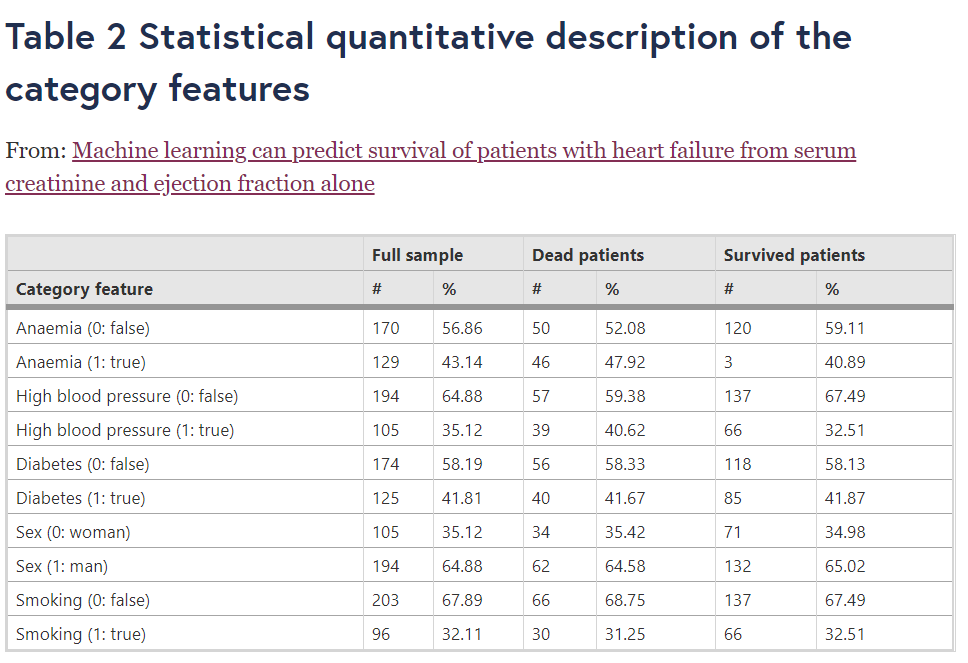

https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5#Tab1

In [1]:
%matplotlib inline
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [2]:
#한글 깨질 때
import matplotlib
from matplotlib import font_manager,rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family = font_name)

matplotlib.rcParams['axes.unicode_minus']=False

In [3]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv",encoding='cp949')

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
data_num = data.drop(columns = ['anaemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking', 'DEATH_EVENT'])

In [7]:
data_num.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [8]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [9]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
dic = {0: '생존환자',
      1: '사망환자'}
x = data['DEATH_EVENT'].replace(dic)
x

0      사망환자
1      사망환자
2      사망환자
3      사망환자
4      사망환자
       ... 
294    생존환자
295    생존환자
296    생존환자
297    생존환자
298    생존환자
Name: DEATH_EVENT, Length: 299, dtype: object

Text(0.5, 1.0, '출력변수')

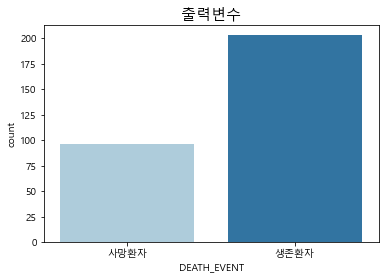

In [11]:
sns.countplot(x, palette = 'Paired')
plt.title("출력변수", size = 15)

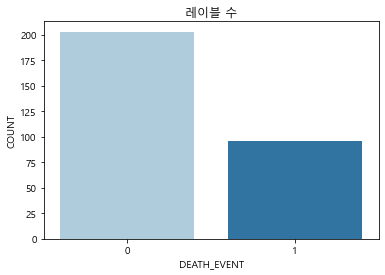

In [12]:
sns.countplot("DEATH_EVENT", palette = 'Paired',data=data)
plt.title("레이블 수")
plt.ylabel("COUNT")
plt.show()

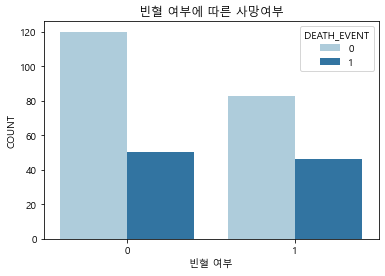

In [13]:
sns.countplot("anaemia", hue = "DEATH_EVENT", palette = 'Paired',data=data)
plt.title("빈혈 여부에 따른 사망여부")
plt.xlabel("빈혈 여부")
plt.ylabel("COUNT")
plt.show()

In [14]:
display(data['anaemia'].value_counts())

0    170
1    129
Name: anaemia, dtype: int64

In [15]:
display(data['DEATH_EVENT'].value_counts())

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [16]:
display(data['DEATH_EVENT'].value_counts())

0    203
1     96
Name: DEATH_EVENT, dtype: int64

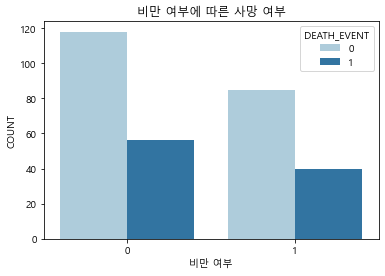

In [17]:
sns.countplot("diabetes", hue = "DEATH_EVENT", palette = 'Paired',data=data)
plt.title("비만 여부에 따른 사망 여부")
plt.xlabel("비만 여부")
plt.ylabel("COUNT")
plt.show()

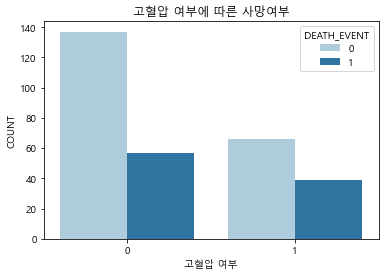

In [18]:
sns.countplot("high_blood_pressure", hue = "DEATH_EVENT",
              palette = 'Paired',data=data)
plt.title("고혈압 여부에 따른 사망여부")
plt.xlabel("고혈압 여부")
plt.ylabel("COUNT")
plt.show()

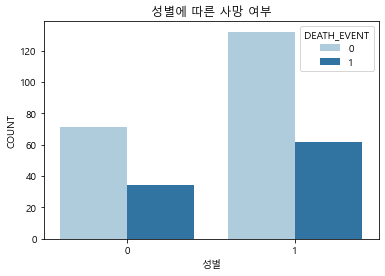

In [19]:
sns.countplot("sex", hue = "DEATH_EVENT", palette = 'Paired',data=data)
plt.title("성별에 따른 사망 여부")
plt.xlabel("성별")
plt.ylabel("COUNT")
plt.show()

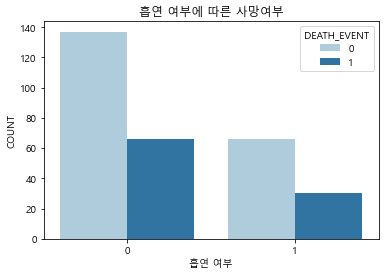

In [20]:
 sns.countplot("smoking", hue = "DEATH_EVENT", palette = 'Paired',data=data)
plt.title("흡연 여부에 따른 사망여부")
plt.xlabel("흡연 여부")
plt.ylabel("COUNT")
plt.show()

<AxesSubplot:>

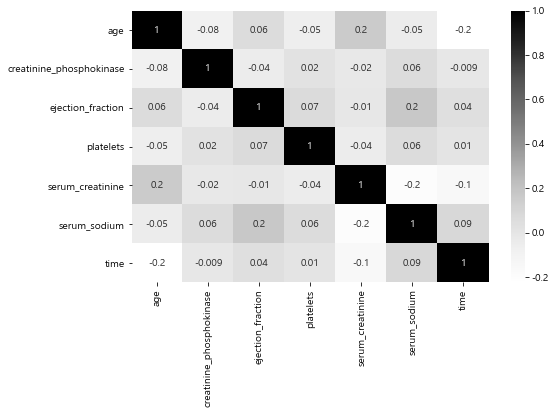

In [21]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize = (8,5))
sns.heatmap(data_num.corr(),annot=True,fmt='.1g',cmap='Greys')

<AxesSubplot:>

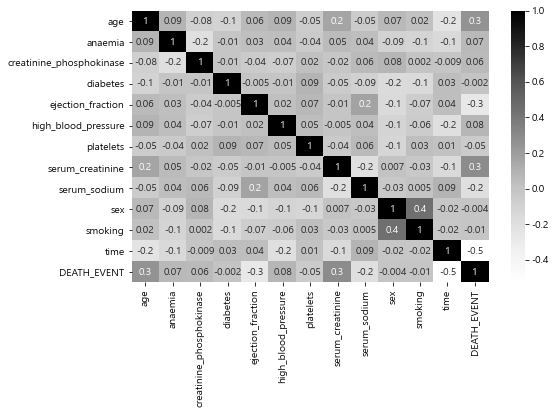

In [22]:
fig, ax = pyplot.subplots(figsize = (8,5))
sns.heatmap(data.corr(),annot=True,fmt='.1g',cmap='Greys')

Text(0.5, 0, '변수')

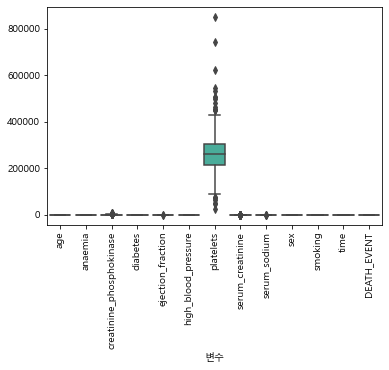

In [23]:
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.xlabel("변수")

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

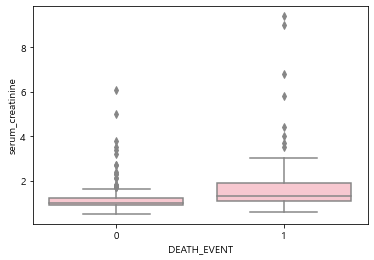

In [24]:
sns.boxplot(x ='DEATH_EVENT', y = 'serum_creatinine',
            data=data, color = 'pink')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

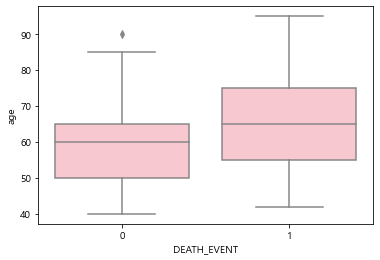

In [25]:
sns.boxplot(x ='DEATH_EVENT',y = 'age', data=data, color = 'pink')

<AxesSubplot:>

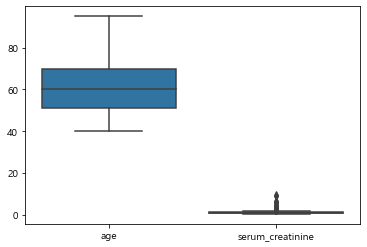

In [26]:
a = data.loc[:,['age','serum_creatinine']]
sns.boxplot(data=a)

## 전처리

In [27]:
# 중복값
print("중복되는 데이터는 ",data.duplicated().sum(),"개 이다.")

중복되는 데이터는  0 개 이다.


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [29]:
vData = data.drop(columns = ['DEATH_EVENT'])

In [30]:
# 정규화(표준화)
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
data_std = stdsc.fit_transform(vData)

In [31]:
data_std = pd.DataFrame(data_std)
data_std

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451
295,-0.491279,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357
296,-1.333392,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697
297,-1.333392,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509


In [32]:
# 학습용&훈련용 데이터 나누기
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data_std,data['DEATH_EVENT'],
                                               test_size=0.3, shuffle=True, 
                                               #무작위추출
                                               stratify = data['DEATH_EVENT'],
                                               random_state=0)

In [33]:
print("X_train 크기 : ", X_train.shape)
print("y_train 크기 : ", y_train.shape)
print("X_test크기:",X_test.shape)
print("y_test크기:",y_test.shape)

X_train 크기 :  (209, 12)
y_train 크기 :  (209,)
X_test크기: (90, 12)
y_test크기: (90,)


In [34]:
# PCA로 어떤 요인이 중요한 영향을 끼치는지
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\n고윳값\n%s '% eigen_vals)


고윳값
[1.76752049 1.66363005 1.42065495 1.2593073  0.5201444  0.60981041
 0.66988099 0.77246891 1.00732888 1.03574491 0.89111615 0.87328562] 


In [35]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in
          sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

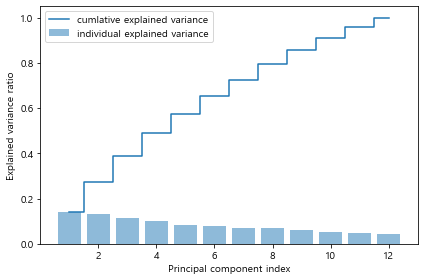

In [36]:
plt.bar(range(1,13), var_exp, alpha = 0.5, align='center',
        label = 'individual explained variance')
plt.step(range(1,13), cum_var_exp, where = 'mid',
         label = 'cumlative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [37]:
from sklearn.decomposition import PCA
data_list = vData.columns
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(X_train)
printcipalComponents[0:5]

array([[-0.1178063 ,  1.76127148],
       [ 0.64222931,  0.01048489],
       [-1.28032103, -1.90673158],
       [ 1.42236859,  0.42142427],
       [ 0.52071717, -0.58885731]])

In [38]:
pca_columns=['pca_component_1','pca_component_2']
dataDF_pca = pd.DataFrame(printcipalComponents,columns=pca_columns)
display(dataDF_pca.head(3))

,pca_component_1,pca_component_2
0,-0.117806,1.761271
1,0.642229,0.010485
2,-1.280321,-1.906732


In [39]:
pca.explained_variance_ratio_

array([0.14150473, 0.13318744])

------------------------------------------------------------------------------
### VIF 한 번 해봄

In [40]:
X = data.drop(columns =['DEATH_EVENT'])
y = data['DEATH_EVENT']

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif2 = pd.DataFrame()
vif2['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif2['features'] = X.columns
vif2 = vif2.round(2)
vif2 = vif2.sort_values(by='VIF')
vif2

,VIF,features
2,1.45,creatinine_phosphokinase
5,1.65,high_blood_pressure
3,1.79,diabetes
10,1.89,smoking
1,1.91,anaemia
7,2.92,serum_creatinine
9,3.80,sex
11,4.35,time
6,8.64,platelets
4,12.08,ejection_fraction


### VIF 해 봄 끝    

----------------------------------------------------------------------------

아마 train_test_split을 먼저 한다음에 그리드서치로 최적의 파라미터를 찾은 후 파이프라인을 사용해야 할 것으로 예상됨.

In [42]:
#성능평가 패키지 import
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [43]:
# 성능평가 결과 입력 데이터프레임 생성
df_per = pd.DataFrame(columns=['Classifier','Accuracy','F-Measure'])
df_per

,Classifier,Accuracy,F-Measure


In [44]:
# Knn 최적의 파라미터를 찾는 법
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param = {
    'n_neighbors':[1,3,7,11,99],
    'p':[1,2]
}
grid_knn = GridSearchCV(knn, param_grid = param, scoring = 'accuracy',cv= 10)

In [45]:
grid_knn.fit(X_train, y_train)
grid_knn.best_params_

{'n_neighbors': 3, 'p': 1}

In [46]:
knn2 = grid_knn.best_estimator_
knn2.fit(X_train,y_train)
pred_knn2 = knn2.predict(X_test)
print("테스트 세트의 정확도 : {:.4f}".format(knn2.score(X_test, y_test)))
print("테스트 세트의 정확도 : {:.4f}".format(np.mean(pred_knn2==y_test)))

테스트 세트의 정확도 : 0.6778
테스트 세트의 정확도 : 0.6778


In [47]:
print(classification_report(y_test, pred_knn2))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        61
           1       0.50      0.38      0.43        29

    accuracy                           0.68        90
   macro avg       0.62      0.60      0.60        90
weighted avg       0.66      0.68      0.66        90



In [48]:
# 성능저장
fm = round(f1_score(y_test,pred_knn2),2)
ac = round(accuracy_score(y_test, pred_knn2, normalize = True),2)
df_per.loc[len(df_per)]=['knn',ac,fm]
df_per

,Classifier,Accuracy,F-Measure
0,knn,0.68,0.43


In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# 최적의 파라미터를 찾는 법
param = {
    'C' : [0.0001,0.01,0.1,1,10,100,1000,10000],
    'solver' : ['liblinear'],
    #'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    'penalty' : ['l1','l2']
}
grid_lr = GridSearchCV(lr, param_grid = param,cv= 13)

In [50]:
grid_lr.fit(X_train,y_train)
grid_lr.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [51]:
# 최적의 조합으로
lr3 = grid_lr.best_estimator_
lr3.fit(X_train,y_train)
pred_lr3 = lr3.predict(X_test)
print("테스트 세트의 정확도 : {:.4f}".format(lr3.score(X_test, y_test)))
print("테스트 세트의 정확도 : {:.4f}".format(np.mean(pred_lr3==y_test)))

테스트 세트의 정확도 : 0.8111
테스트 세트의 정확도 : 0.8111


In [52]:
print(classification_report(y_test, pred_lr3))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        61
           1       0.71      0.69      0.70        29

    accuracy                           0.81        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.81      0.81      0.81        90



In [53]:
# 성능저장
fm = round(f1_score(y_test,pred_lr3),2)
ac = round(accuracy_score(y_test, pred_lr3, normalize = True),2)
df_per.loc[len(df_per)]=['Logistic Regression',ac,fm]
df_per

,Classifier,Accuracy,F-Measure
0,knn,0.68,0.43
1,Logistic Regression,0.81,0.70


In [54]:
# Decision Tree 최적의 파라미터를 찾는 법
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
param = {
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,10,40,100],
    'min_samples_split':[5,10,15,20,30,100]
}
grid_dtc = GridSearchCV(dtc, param_grid = param, scoring = 'accuracy',cv= 10)

In [55]:
grid_dtc.fit(X_train, y_train)
grid_dtc.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 20}

In [56]:
dtc2 = grid_dtc.best_estimator_
dtc2.fit(X_train,y_train)
pred_dtc2 = dtc2.predict(X_test)
print("테스트 세트의 정확도 : {:.4f}".format(dtc2.score(X_test, y_test)))
print("테스트 세트의 정확도 : {:.4f}".format(np.mean(pred_dtc2==y_test)))

테스트 세트의 정확도 : 0.8222
테스트 세트의 정확도 : 0.8222


In [57]:
print(classification_report(y_test,pred_dtc2))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        61
           1       0.76      0.66      0.70        29

    accuracy                           0.82        90
   macro avg       0.80      0.78      0.79        90
weighted avg       0.82      0.82      0.82        90



In [58]:
# 성능저장
fm = round(f1_score(y_test,pred_dtc2),2)
ac = round(accuracy_score(y_test, pred_dtc2, normalize = True),2)
df_per.loc[len(df_per)]=['Decision Tree',ac,fm]
df_per

,Classifier,Accuracy,F-Measure
0,knn,0.68,0.43
1,Logistic Regression,0.81,0.70
2,Decision Tree,0.82,0.70


In [59]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rf_param_grid = {
    'n_estimators' : [50,130,140],
    # 결정트리 개수
    'max_depth' : [9,11,13,15],
    # 트리의 깊이
    'min_samples_split' : [3,5,13,15]
    # 노드를 분할하기 위한 최소한의 데이터 수
}
grid_rfc = GridSearchCV(rfc, param_grid = rf_param_grid,
                        scoring = 'accuracy',cv= 10)

In [60]:
grid_rfc.fit(X_train,y_train)
grid_rfc.best_params_

{'max_depth': 11, 'min_samples_split': 13, 'n_estimators': 130}

In [61]:
rfc2 = grid_rfc.best_estimator_
rfc2.fit(X_train,y_train)
pred_rfc2 = rfc2.predict(X_test)
print("테스트 세트의 정확도 : {:.4f}".format(rfc2.score(X_test, y_test)))
print("테스트 세트의 정확도 : {:.4f}".format(np.mean(pred_rfc2==y_test)))

테스트 세트의 정확도 : 0.8222
테스트 세트의 정확도 : 0.8222


In [62]:
print(classification_report(y_test, pred_rfc2))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        61
           1       0.72      0.72      0.72        29

    accuracy                           0.82        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.82      0.82      0.82        90



In [63]:
importances = rfc2.feature_importances_
indices = np.argsort(importances)[::-1]

In [64]:
feat_labels = vData.columns[:]
for f in range(X_train.shape[1]):
              print("%2d)%-*s %f" % (f+1, 30, 
                   feat_labels[indices[f]],
                   importances[indices[f]]))

 1)time                           0.389488
 2)serum_creatinine               0.174778
 3)ejection_fraction              0.173757
 4)age                            0.076423
 5)creatinine_phosphokinase       0.060912
 6)serum_sodium                   0.051396
 7)platelets                      0.049595
 8)high_blood_pressure            0.005352
 9)smoking                        0.005151
10)anaemia                        0.004989
11)diabetes                       0.004233
12)sex                            0.003925


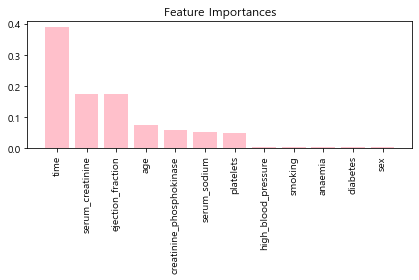

In [65]:
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]),
       importances[indices],
       align='center', color = 'pink')
plt.xticks(range(X_train.shape[1]),feat_labels[indices], rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

In [66]:
# 성능저장
fm = round(f1_score(y_test,pred_rfc2),2)
ac = round(accuracy_score(y_test, pred_rfc2, normalize = True),2)
df_per.loc[len(df_per)]=['Random Forest',ac,fm]
df_per

,Classifier,Accuracy,F-Measure
0,knn,0.68,0.43
1,Logistic Regression,0.81,0.70
2,Decision Tree,0.82,0.70
3,Random Forest,0.82,0.72


In [67]:
# 최적의 파라미터를 찾는 법
from sklearn.svm import SVC
svc = SVC()
param = {
    'C' : [0.001,0.1,1,10,50,1000],
    'kernel' : ['linear','rbf'],
    'gamma':[0.00001,0.0001,0.001,0.01,1,10,100]
    # gamma는 일종의 상수값을 변동시킬 수 있었음.
}
grid_svc = GridSearchCV(svc, param_grid = param, scoring = 'accuracy',cv= 10)

In [68]:
grid_svc.fit(X_train,y_train)
grid_svc.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [69]:
# 최적의 조합으로
svc2 = grid_svc.best_estimator_
svc2.fit(X_train,y_train)
pred_svc2 = svc2.predict(X_test)
print("테스트 세트의 정확도 : {:.4f}".format(svc2.score(X_test, y_test)))
print("테스트 세트의 정확도 : {:.4f}".format(np.mean(pred_svc2==y_test)))

테스트 세트의 정확도 : 0.7889
테스트 세트의 정확도 : 0.7889


In [70]:
print(classification_report(y_test,pred_svc2))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        61
           1       0.69      0.62      0.65        29

    accuracy                           0.79        90
   macro avg       0.76      0.74      0.75        90
weighted avg       0.78      0.79      0.79        90



In [71]:
# 성능저장
fm = round(f1_score(y_test,pred_svc2),2)
ac = round(accuracy_score(y_test, pred_svc2, normalize = True),2)
df_per.loc[len(df_per)]=['SVM',ac,fm]
df_per

,Classifier,Accuracy,F-Measure
0,knn,0.68,0.43
1,Logistic Regression,0.81,0.70
2,Decision Tree,0.82,0.70
3,Random Forest,0.82,0.72
4,SVM,0.79,0.65


1위 : 랜덤포레스트, 2위 의사결정나무, 3위 : 로지스틱 회귀분석

### 다수결 투표를 사용한 분류 앙상블

In [72]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import operator

In [73]:
import sklearn.base

In [74]:
class MajorityVoteClassifier(BaseEstimator,ClassifierMixin):
    def __init__(self,classifiers,vote='classlabel',weights=None):
        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights
        
    def fit(self,X,y):
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        
        self.classifiers_ = []
        
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X,self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self
    
    def predict(self, X):
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X),
                                axis=1)
        else:
            predictions = np.asarray([clf.predict(X)
                                     for clf in
                                     self.classifiers_]).T
            
            maj_vote = np.apply_along_axis(lambda x:
                                          np.argmax(np.bincount(x,weights=self.weights)),axis=1,arr=predictions)
            maj_vote = self.lablenc_.inverse_transform(maj_vote)
            return maj_vote
    def predict_proba(self,X):
        probas = np.asarray([clf.predict_proba(X)
                            for clf in self.classifiers_])
        avg_proba = np.average(probas,axis=0,weights= self.weights)
        return avg_proba
    def get_params(self, deep=True):
        
        if not deep:
            return super(MajorityVoteClassifier,self).get_params(deep=False)
        else:
            out = self.naemd_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(
                        step.get_params(deep=True)):
                    out['%s__%s' % (name,key)] = value
        return out

In [75]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import operator
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [76]:
pipe1 = Pipeline([['clf',rfc2]])
pipe2 = Pipeline([['clf',dtc2]])
pipe3 = Pipeline([['clf',lr3]])
clf_labels = ['Random Forest', 'Dicision Tree', 'Logistic Regression']
print('10-겹 교차검증 : \n')
for clf, label in zip([pipe1, pipe2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                            X=X_train,
                            y=y_train,
                            cv = 10,
                            scoring = 'roc_auc')
    print("ROC AUC : %0.2f (+/- %0.2f)[%s]"
          %(scores.mean(), scores.std(), label))

10-겹 교차검증 : 

ROC AUC : 0.92 (+/- 0.06)[Random Forest]
ROC AUC : 0.84 (+/- 0.08)[Dicision Tree]
ROC AUC : 0.86 (+/- 0.09)[Logistic Regression]


In [77]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1,pipe2,pipe3])
clf_labels += ['Majority voting']
all_clf = [pipe1, pipe2, pipe3, mv_clf]
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator = clf,
                            X=X_train,
                            y=y_train,
                            cv = 10,
                            scoring = 'roc_auc')
    print("ROC AUC : %0.2f (+/- %0.2f)[%s]"
         %(scores.mean(), scores.std(), label))

ROC AUC : 0.91 (+/- 0.05)[Random Forest]
ROC AUC : 0.85 (+/- 0.08)[Dicision Tree]
ROC AUC : 0.86 (+/- 0.09)[Logistic Regression]
ROC AUC : 0.89 (+/- 0.08)[Majority voting]


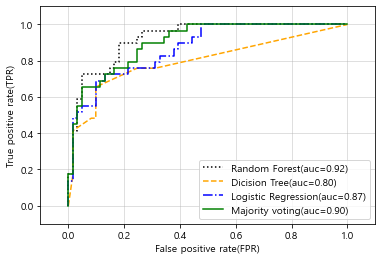

In [78]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

colors = ['black','orange','blue','green']
linestyles = [':', '--', '-.', '-']

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    # 양성 클래스의 레이블 = 1(사망환자)
    y_pred = clf.fit(X_train,y_train).predict_proba(X_test)[:,1]
    
    fpr, tpr, thresholds = roc_curve(y_true = y_test,
                                    y_score = y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
            color = clr,
            linestyle = ls,
            label = '%s(auc=%0.2f)'%(label,roc_auc))
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.grid(alpha = 0.5)
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.legend()
plt.show()

In [79]:
#pipe1 = Pipeline([['clf',rfc2]])
#pipe2 = Pipeline([['clf',dtc2]])
#pipe3 = Pipeline([['clf',lr3]])

In [80]:
clf1 = rfc2
clf2 = dtc2
clf3 = lr3
clf_labels = ['Random Forest', 'Dicision Tree', 'Logistic Regression']
print('10-겹 교차검증 : \n')
for clf, label in zip([clf1, clf2, clf3], clf_labels):
    scores = cross_val_score(estimator=clf,
                            X=X_train,
                            y=y_train,
                            cv = 10,
                            scoring = 'roc_auc')
    print("ROC AUC : %0.2f (+/- %0.2f)[%s]"
          %(scores.mean(), scores.std(), label))

10-겹 교차검증 : 

ROC AUC : 0.91 (+/- 0.06)[Random Forest]
ROC AUC : 0.84 (+/- 0.08)[Dicision Tree]
ROC AUC : 0.86 (+/- 0.09)[Logistic Regression]


In [81]:
mv_clf = MajorityVoteClassifier(classifiers=[clf1,clf2,clf3])
clf_labels += ['Majority voting']
all_clf = [clf1, clf2, clf3, mv_clf]
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator = clf,
                            X=X_train,
                            y=y_train,
                            cv = 10,
                            scoring = 'roc_auc')
    print("ROC AUC : %0.2f (+/- %0.2f)[%s]"
         %(scores.mean(), scores.std(), label))

ROC AUC : 0.92 (+/- 0.06)[Random Forest]
ROC AUC : 0.84 (+/- 0.08)[Dicision Tree]
ROC AUC : 0.86 (+/- 0.09)[Logistic Regression]
ROC AUC : 0.90 (+/- 0.07)[Majority voting]


In [82]:
clf_labels

['Random Forest', 'Dicision Tree', 'Logistic Regression', 'Majority voting']

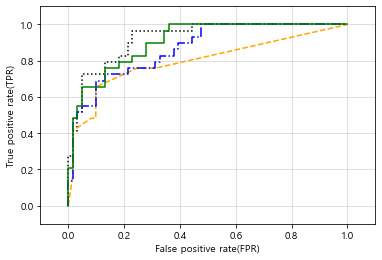

In [83]:
colors = ['black','orange','blue','green']
linestyles = [':', '--', '-.', '-']

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    # 양성 클래스의 레이블 = 1(사망환자)
    y_pred = clf.fit(X_train,y_train).predict_proba(X_test)[:,1]
    
    fpr, tpr, thresholds = roc_curve(y_true = y_test,
                                    y_score = y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
            color = clr,
            linestyle = ls,
            label = '%s(auc=%0.2f)'%(label,roc_auc))
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.grid(alpha = 0.5)
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.show()

In [84]:
y_pred = clf.fit(X_train,y_train)
y_real_pred = clf.predict(X_test)

In [85]:
print("테스트 세트의 정확도 : {:.4f}".format(np.mean(y_real_pred==y_test)))

테스트 세트의 정확도 : 0.8444


In [86]:
# 성능저장
fm = round(f1_score(y_test,y_real_pred),2)
ac = round(accuracy_score(y_test, y_real_pred, normalize = True),2)
df_per.loc[len(df_per)]=['Majority voting',ac,fm]
df_per

,Classifier,Accuracy,F-Measure
0,knn,0.68,0.43
1,Logistic Regression,0.81,0.70
2,Decision Tree,0.82,0.70
3,Random Forest,0.82,0.72
4,SVM,0.79,0.65
5,Majority voting,0.84,0.75


In [87]:
df_per_1 = df_per.set_index('Classifier')
df_per_1

,Accuracy,F-Measure
Classifier,,
knn,0.68,0.43
Logistic Regression,0.81,0.70
Decision Tree,0.82,0.70
Random Forest,0.82,0.72
SVM,0.79,0.65
Majority voting,0.84,0.75


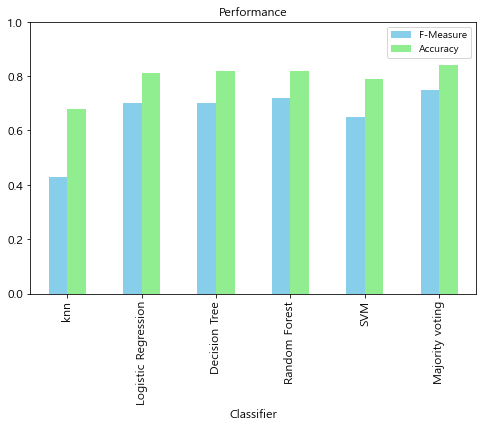

In [88]:
ax = df_per_1[['F-Measure','Accuracy']].plot(kind='bar',title = 'Performance',
                                            figsize =(8,5),ylim=[0,1],
                                             color = ['skyblue','lightgreen'],
                                             legend = True, fontsize = 12)
ax.set_xlabel('Classifier',fontsize = 12)
plt.show()